# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

#ANSWER:

## Using Bayes' Theorem
$$
p(\theta \mid x, n) = \frac{p(x \mid \theta, n) p(\theta)}{p(x)}.
$$
---

$$
p(x \mid \theta, n) = \binom{n}{x} \theta^x (1 - \theta)^{n-x}.
$$
---

$$
p(\theta) = \frac{1}{k}, \quad \text{for } \theta \in \left\{ 0, \frac{1}{k-1}, \frac{2}{k-1}, \dots, 1 \right\}.
$$
---
$$
p(\theta \mid x, n) \propto p(x \mid \theta, n) p(\theta).
$$

Substituting the likelihood and prior:
$$
p(\theta \mid x, n) \propto \binom{n}{x} \theta^x (1 - \theta)^{n-x} \cdot \frac{1}{k}.
$$
$$
p(theta \mid x, n) \propto \theta^x (1 - \theta)^{n-x}.
$$


## 4. Conclusion
The posterior \( p(theta | x, n) \) follows a Beta distribution with parameterization
:$$ α = x + 1 and \beta = n - x + 1$$
$$
p(\theta \mid x, n) \sim \text{Beta}(\alpha = x+1, \beta = n-x+1),
$$



### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{Beta distribution}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

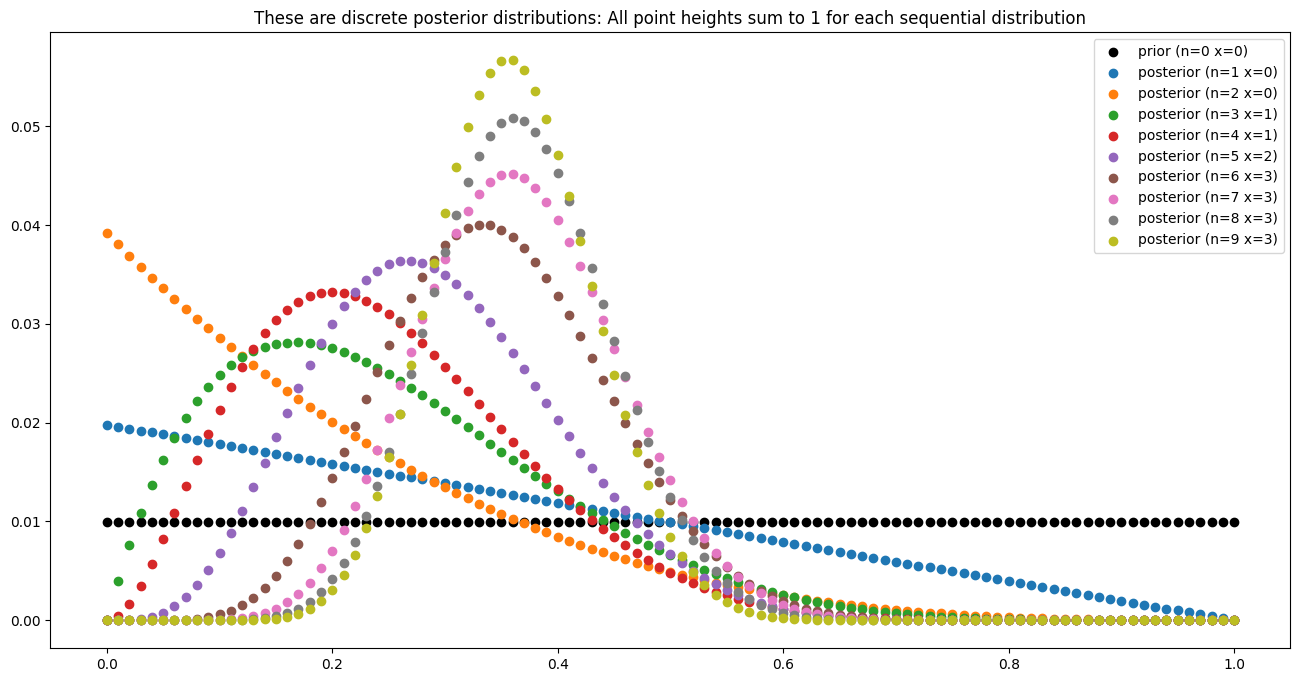

In [ ]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    liklihood = parameter_domain**x * (1-parameter_domain)**(n-x)
    posterior = liklihood * prior
    posterior /= posterior.sum()
    prior = posterior
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

In [1]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [13]:
alpha1 = alpha2 = 1
beta1 = beta2 = 1
x1 = x2 = 0
n1 = n2 = 0
theta_true1 = 0.66
theta_true2 = 0.65
m = 100

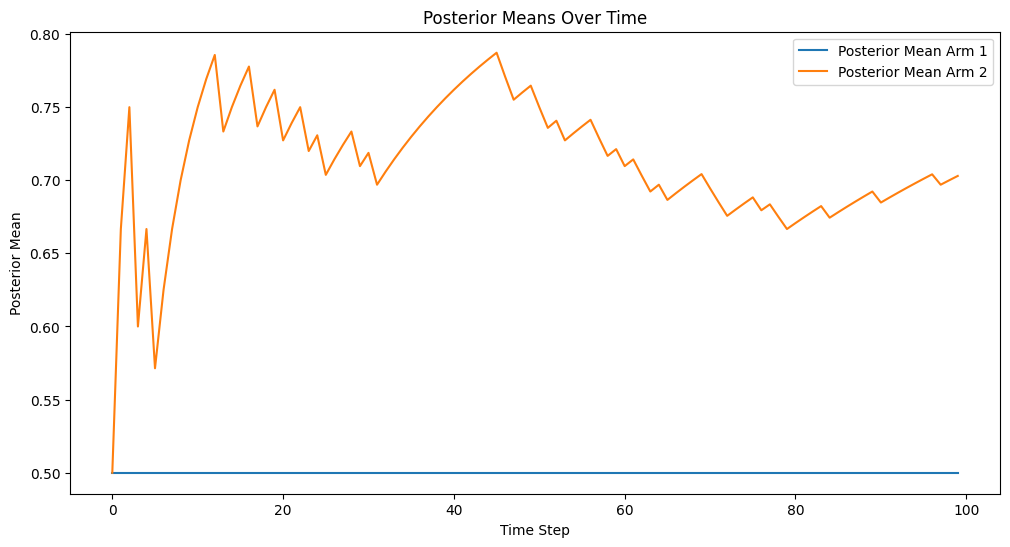

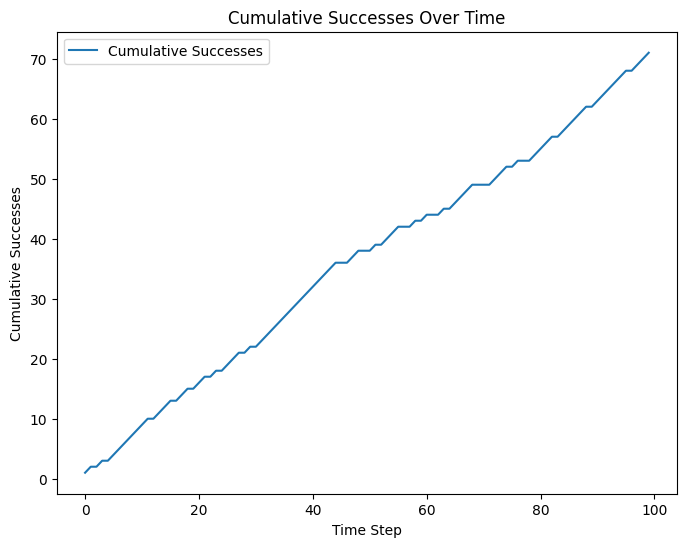

In [14]:
posterior_means_arm1 = []
posterior_means_arm2 = []
successes = []

for t in range(m):
    mean_arm1 = (alpha1 + x1) / (alpha1 + beta1 + n1)
    mean_arm2 = (alpha2 + x2) / (alpha2 + beta2 + n2)

    posterior_means_arm1.append(mean_arm1)
    posterior_means_arm2.append(mean_arm2)

    if mean_arm1 > mean_arm2:
        choice = 1
    else:
        choice = 2

    if choice == 1:
        n1 += 1
        if np.random.rand() < theta_true1:
            x1 += 1
            successes.append(1)
        else:
            successes.append(0)
    else:
        n2 += 1
        if np.random.rand() < theta_true2:
            x2 += 1
            successes.append(1)
        else:
            successes.append(0)

# learning process
plt.figure(figsize=(12, 6))
plt.plot(posterior_means_arm1, label="Posterior Mean Arm 1")
plt.plot(posterior_means_arm2, label="Posterior Mean Arm 2")
plt.title("Posterior Means Over Time")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()

# Plotting cumulative successes
plt.figure(figsize=(8, 6))
cumulative_successes = np.cumsum(successes)
plt.plot(cumulative_successes, label="Cumulative Successes")
plt.title("Cumulative Successes Over Time")
plt.xlabel("Time Step")
plt.ylabel("Cumulative Successes")
plt.legend()
plt.show()


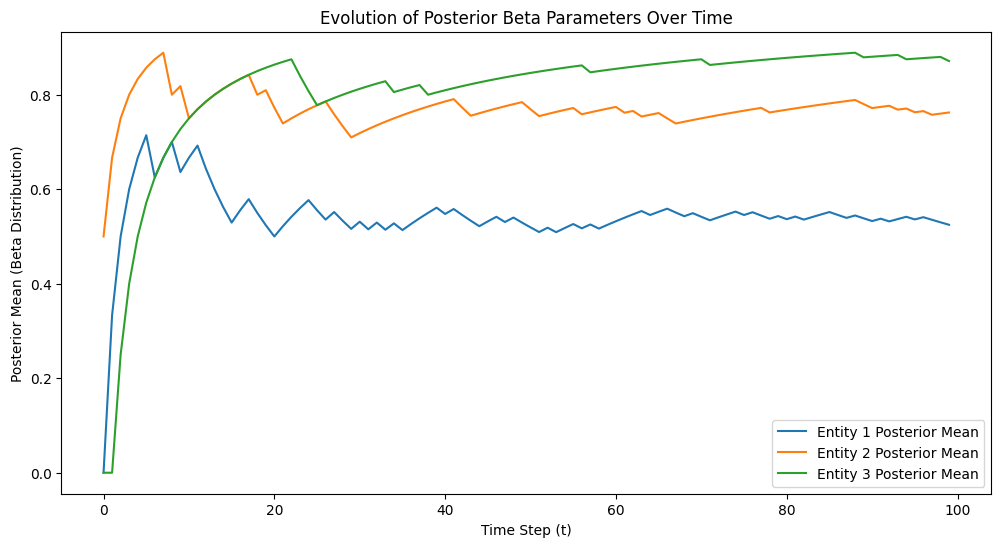

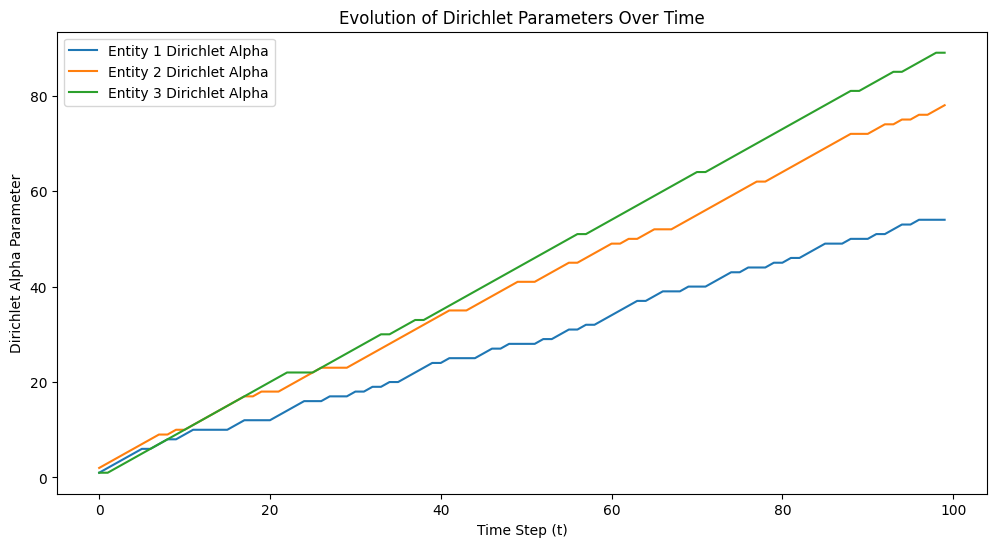

In [26]:
# Q3
m = 100
theta_true = [0.5, 0.7, 0.9]
successes_beta = [0] * 3
successes_dir = [0] * 3
post_beta_params = [[], [], []]
post_dir_params = []
alpha_d = [1] * 3
betas = [1] * 3
n = [0] * 3

for t in range(m):
    res = [np.random.rand() < theta_true[j] for j in range(3)]

    for j in range(3):
        n[j] += 1
        successes_beta[j] += res[j]
        post_beta_params[j].append((successes_beta[j] + alpha_d[j] - 1, n[j] - successes_beta[j] + betas[j]))

    successes_dir = [successes_dir[j] + res[j] for j in range(3)]
    alpha_d_post = [alpha_d[j] + successes_dir[j] for j in range(3)]
    post_dir_params.append(alpha_d_post)

post_means_1 = [post_beta_params[0][t][0] / (post_beta_params[0][t][0] + post_beta_params[0][t][1]) for t in range(m)]
post_means_2 = [post_beta_params[1][t][0] / (post_beta_params[1][t][0] + post_beta_params[1][t][1]) for t in range(m)]
post_means_3 = [post_beta_params[2][t][0] / (post_beta_params[2][t][0] + post_beta_params[2][t][1]) for t in range(m)]

plt.figure(figsize=(12, 6))
plt.plot(post_means_1, label=f'Entity {1} Posterior Mean')
plt.plot(post_means_2, label=f'Entity {2} Posterior Mean')
plt.plot(post_means_3, label=f'Entity {3} Posterior Mean')
plt.xlabel("Time Step (t)")
plt.ylabel("Posterior Mean (Beta Distribution)")
plt.legend()
plt.title("Evolution of Posterior Beta Parameters Over Time")
plt.show()

plt.figure(figsize=(12, 6))
for j in range(3):
    post_alphas = [post_dir_params[t][j] for t in range(m)]
    plt.plot(post_alphas, label=f'Entity {j+1} Dirichlet Alpha')
plt.xlabel("Time Step (t)")
plt.ylabel("Dirichlet Alpha Parameter")
plt.legend()
plt.title("Evolution of Dirichlet Parameters Over Time")
plt.show()


#Q3
If your senario is looking at two or methods and testing which is better through AB testing and the methods are independent of each other the Beta-bernoulli model is better.
If the senario is not indepenedent then it is better to use the Dirichelt-multinomial model. Since in the real world there are interdependices between things teh Dirichelt-multinomial model is better.

One exmaple of this when publishing an article with different titles to see which one would drive more users. In this case the article is not independent since as more people learn about the articles it will accuulate shares and so the Dirchilet-multinomial model is better.